In [ ]:
#import necessary Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
data=pd.read_csv('Admission_Predict.csv')
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.drop(["Serial No."],axis=1,inplace=True)
data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
data=data.rename(columns={'Chance of Admit':'Chance of Admit'})

In [ ]:
data.isnull().any()


GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<Axes: >

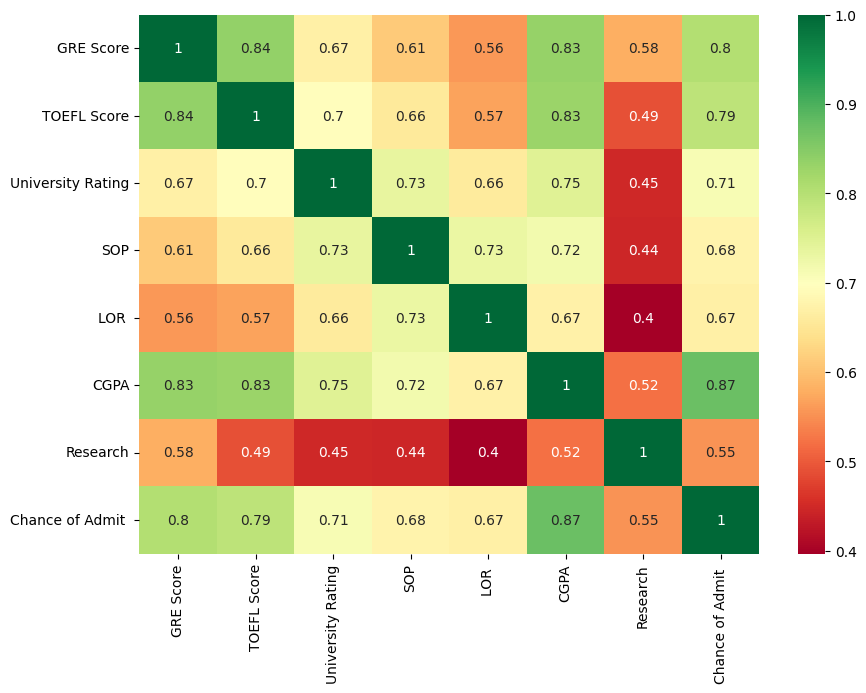

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

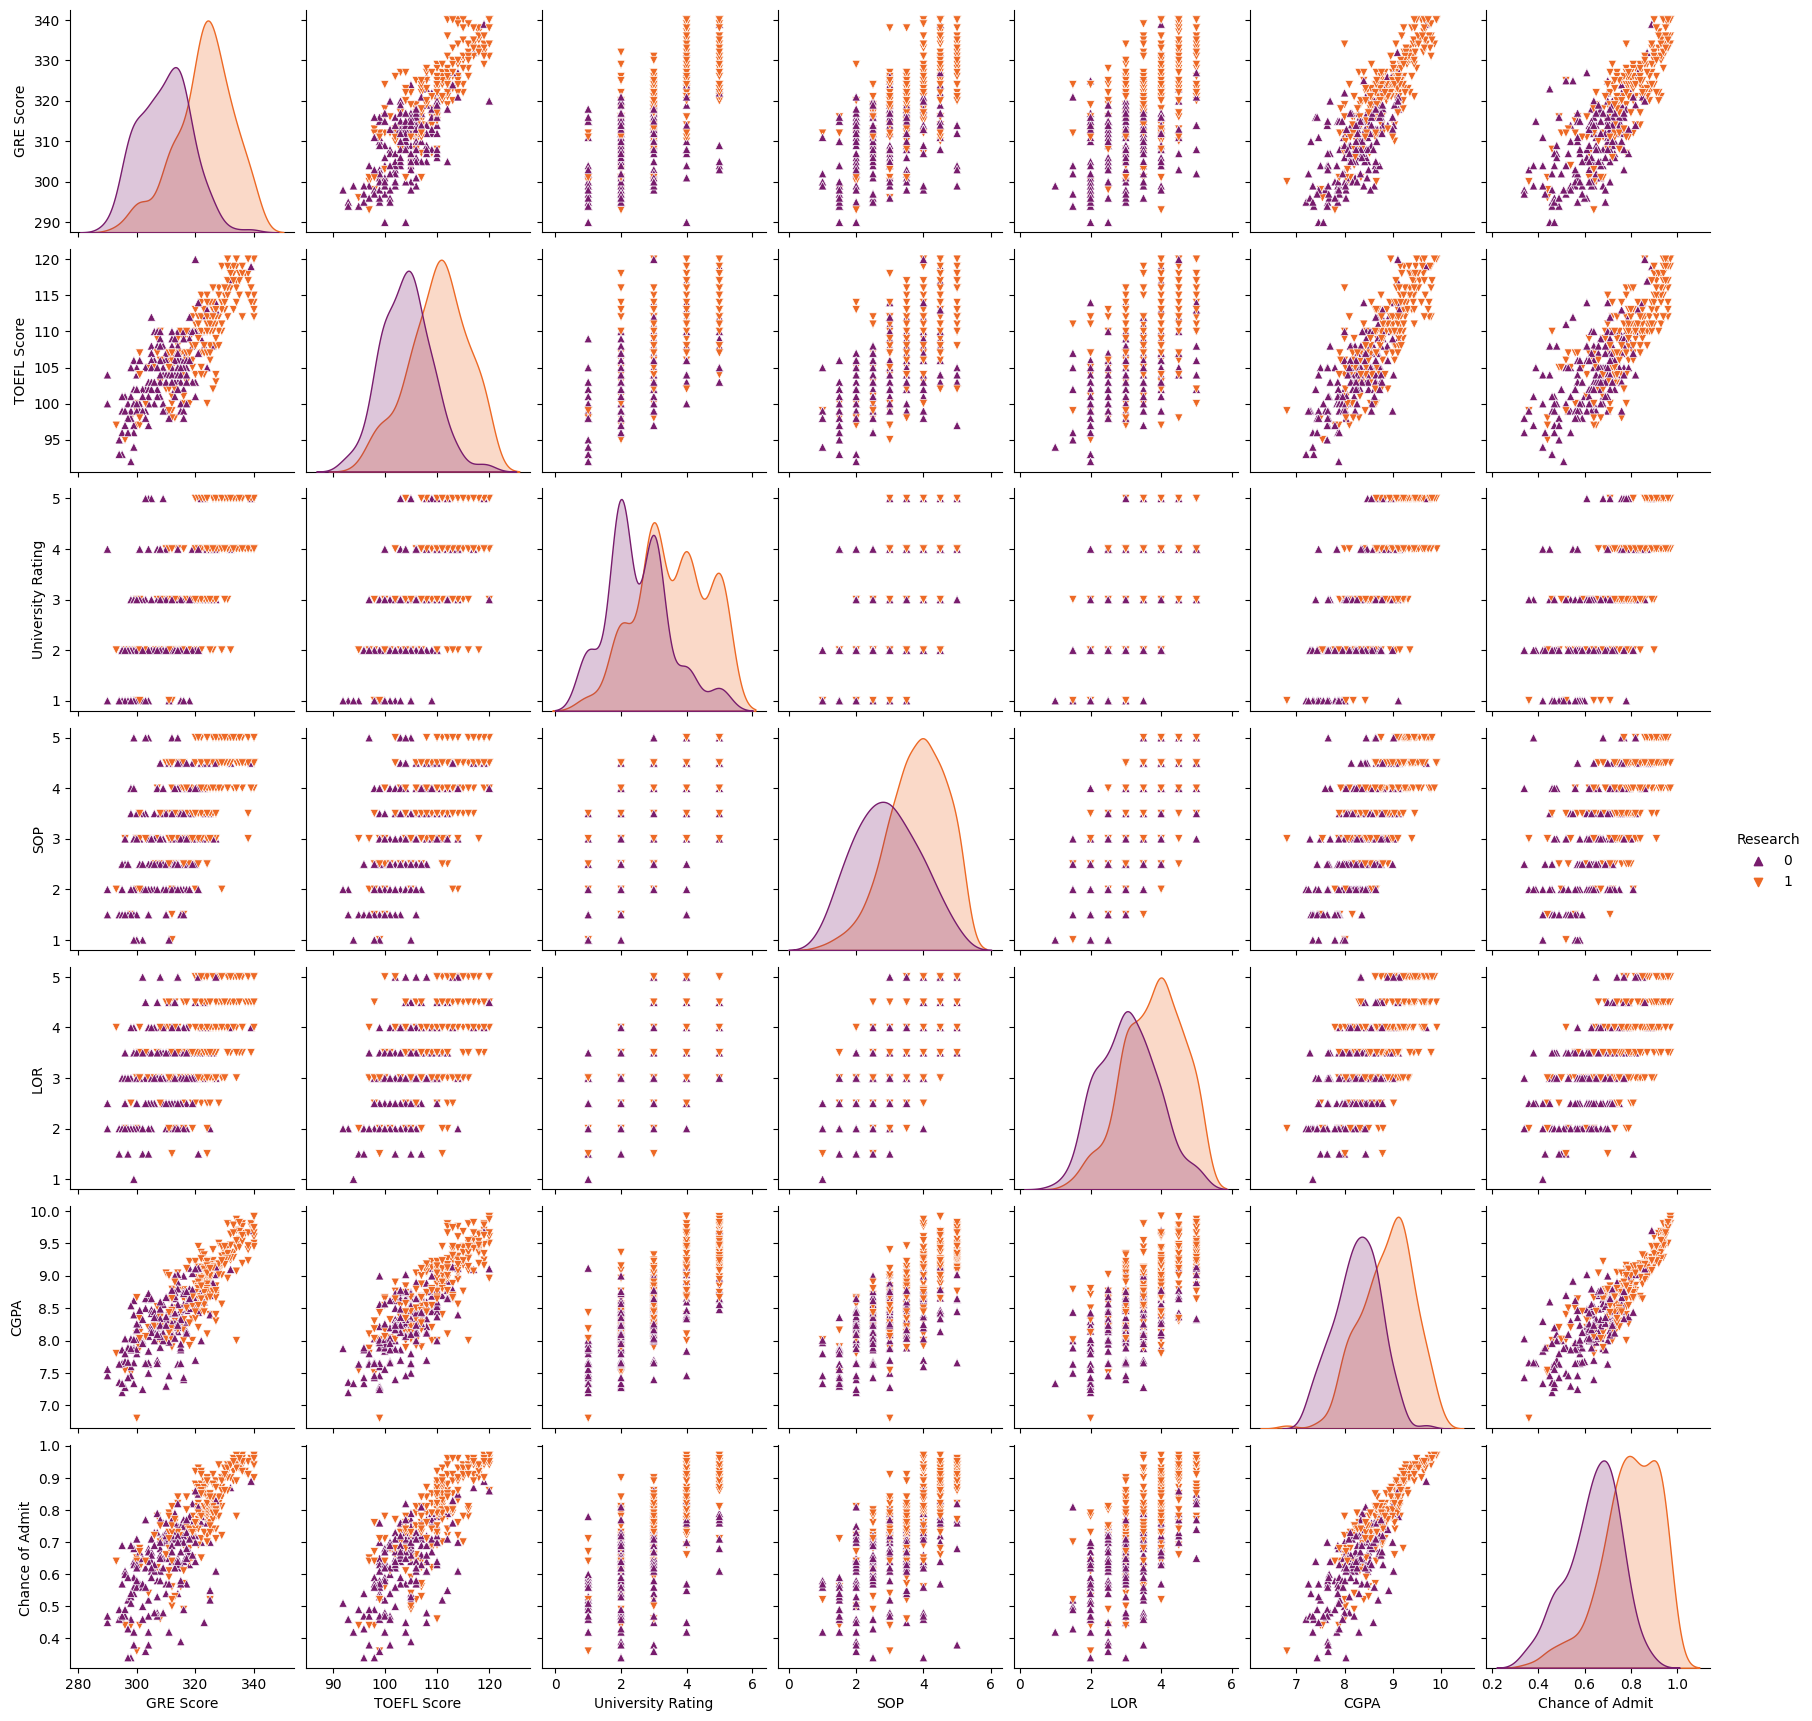

In [ ]:
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

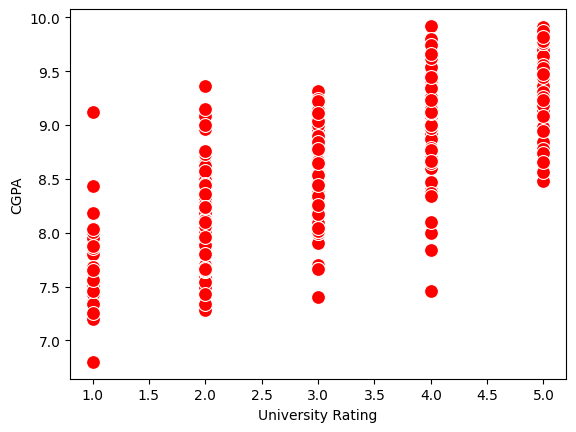

In [ ]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red', s=100)

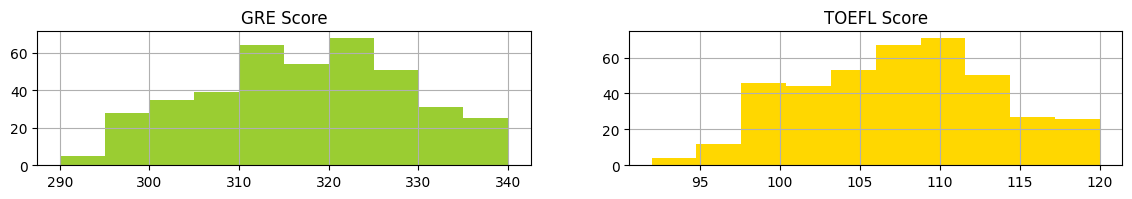

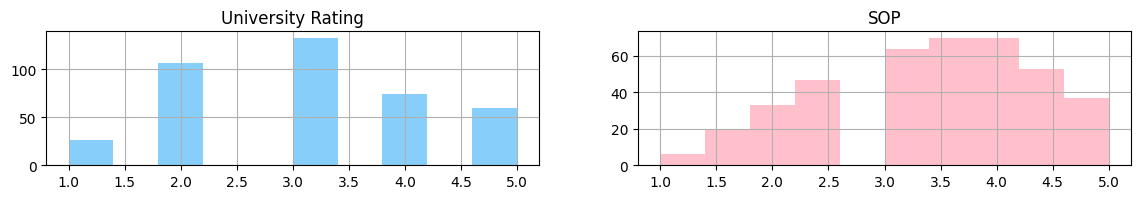

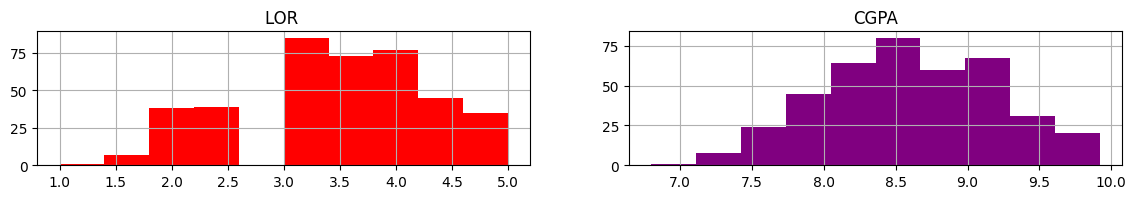

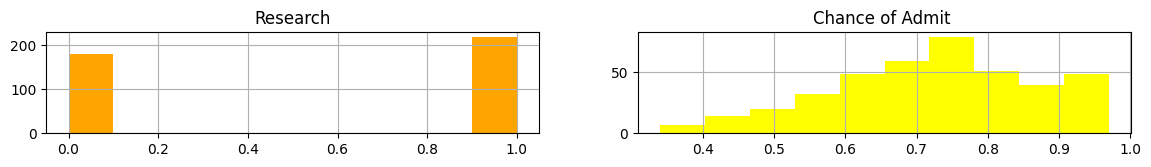

In [ ]:
category=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']
color=['yellowgreen','gold','lightskyblue','pink','red','purple','orange','yellow']
start=True
for i in np.arange(4):
  fig=plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  data[category[2*i]].hist(color=color[2*i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
  plt.title(category[2*i+1])

plt.subplots_adjust(hspace=0.7, wspace= 0.2)
plt.show()  


                      

In [ ]:
print('Mean CGPA Score is :',int(data['CGPA'].mean()))
print('Mean GRE Score is :',int(data['GRE Score'].mean()))
print('Mean GRE Score is :',int(data['TOEFL Score'].mean()))
#print('mean Univrsity ratig is :',int(data[data['University Rating']<500].Univrsity Rating.mean()))


Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean GRE Score is : 107


In [ ]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
x=data.iloc[:,0:-1].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [ ]:
y=data['Chance of Admit '].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)
x

array([[0.94      , 0.92857143, 0.75      , ..., 0.875     , 0.91346154,
        1.        ],
       [0.68      , 0.53571429, 0.75      , ..., 0.875     , 0.66346154,
        1.        ],
       [0.52      , 0.42857143, 0.5       , ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.8       , 0.85714286, 0.75      , ..., 0.875     , 0.84935897,
        1.        ],
       [0.44      , 0.39285714, 0.5       , ..., 0.75      , 0.63461538,
        0.        ],
       [0.86      , 0.89285714, 0.75      , ..., 0.75      , 0.91666667,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=42)
#random_state acts as the seed for the random number generator during the split                               

In [ ]:
y_train.shape

(320,)

In [ ]:
x_train

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [ ]:
y_train=(y_train>0.5)
y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
y_test=(y_test>0.5)
y_test


array([ True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True])

In [ ]:
def logreg(x_train,x_test,y_train,y_test):
  lr = LogisticRegression(random_state=0)
  lr.fit(x_train,y_train)
  y_lr_tr = lr.predict(x_train)
  print(accuracy_score(y_lr_tr,y_train))
  yPred_lr = lr.predict(x_test)
  print(accuracy_score(yPred_lr,y_test))
  print("***Logistic Regression***")
  print("Confussion_matrix")
  print(confusion_matrix(y_test,yPred_lr))
  print("Classfication Report")
  print(classification_report(y_test,yPred_lr))

















 

In [ ]:
logreg(x_train,x_test,y_train,y_test)

0.934375
0.875
***Logistic Regression***
Confussion_matrix
[[ 0 10]
 [ 0 70]]
Classfication Report
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        10
        True       0.88      1.00      0.93        70

    accuracy                           0.88        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.77      0.88      0.82        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#testing on test & random input values
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on test values")
lr_pred =lr.predict(x_test)
print("output is: ",lr_pred)
print("predicting on random input")
lr_pred_own = lr.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1,]]))
print("output is: ",lr_pred_own)

Predicting on test values
output is:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
predicting on random input
output is:  [ True]


In [ ]:
#model building - Decision Tree classifier
def decisionTree(x_train,x_test,y_train,y_test):
  dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
  dtc.fit(x_train,y_train)
  y_dt_tr =  dtc.predict(x_train)
  print(accuracy_score(y_dt_tr,y_train))
  yPred_dt = dtc.predict(x_test)
  print(accuracy_score(yPred_dt,y_test))
  print("***Decision Tree***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_dt))
  print("Classification Report")
  print(classification_report(y_test,yPred_dt))

In [ ]:
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.8875
***Decision Tree***
Confusion_Matrix
[[ 5  5]
 [ 4 66]]
Classification Report
              precision    recall  f1-score   support

       False       0.56      0.50      0.53        10
        True       0.93      0.94      0.94        70

    accuracy                           0.89        80
   macro avg       0.74      0.72      0.73        80
weighted avg       0.88      0.89      0.88        80



In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("Predicting on test values")
dtc_pred =dtc.predict(x_test)
print("output is: ",dtc_pred)
print("Predicting on random input")
dtc_pred_own = dtc.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))
print("output is: ",dtc_pred_own)

Predicting on test values
output is:  [ True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True False  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Predicting on random input
output is:  [ True]


In [ ]:
def RandomForest(x_train,x_test,y_train,y_test):
  rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
  rf.fit(x_train,y_train)
  y_rf_tr = rf.predict(x_train)
  print(accuracy_score(y_rf_tr,y_train))
  yPred_rf = rf.predict(x_test)
  print(accuracy_score(yPred_rf,y_test))
  print("***Random Forest***")
  print("Confusion_Matrix")
  print(confusion_matrix(y_test,yPred_rf))
  print("Classification Report")
  print(classification_report(y_test,yPred_rf))

In [ ]:
RandomForest(x_train,x_test,y_train,y_test)


0.996875
0.9
***Random Forest***
Confusion_Matrix
[[ 2  8]
 [ 0 70]]
Classification Report
              precision    recall  f1-score   support

       False       1.00      0.20      0.33        10
        True       0.90      1.00      0.95        70

    accuracy                           0.90        80
   macro avg       0.95      0.60      0.64        80
weighted avg       0.91      0.90      0.87        80



In [ ]:
#testing on test & random input values
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on test vlues")
rf_pred =rf.predict(x_test)
print("output is: ",rf_pred)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[337,119,4,4.5,4.5,9.65,1]]))
print("output is: ",rf_pred_own)

Predicting on test vlues
output is:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True]
Predicting on random input
output is:  [ True]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=7, activation='relu', input_dim=7))


In [ ]:
classifier.add(Dense(units=7, activation='relu'))

In [ ]:
classifier.add(Dense(units=1, activation='linear'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model = classifier.fit(x_train, y_train, batch_size=10, validation_split=0.33, epochs=20)

Epoch 1/20
22/22 [==============================] - 1s 15ms/step - loss: 13.7680 - accuracy: 0.0748 - val_loss: 12.5635 - val_accuracy: 0.0849
Epoch 2/20
22/22 [==============================] - 0s 5ms/step - loss: 12.5378 - accuracy: 0.0748 - val_loss: 10.4049 - val_accuracy: 0.0849
Epoch 3/20
22/22 [==============================] - 0s 4ms/step - loss: 9.3259 - accuracy: 0.0748 - val_loss: 4.8516 - val_accuracy: 0.0849
Epoch 4/20
22/22 [==============================] - 0s 4ms/step - loss: 3.3380 - accuracy: 0.0841 - val_loss: 1.1403 - val_accuracy: 0.1132
Epoch 5/20
22/22 [==============================] - 0s 4ms/step - loss: 1.1004 - accuracy: 0.1542 - val_loss: 0.8939 - val_accuracy: 0.2358
Epoch 6/20
22/22 [==============================] - 0s 4ms/step - loss: 0.8948 - accuracy: 0.3084 - val_loss: 0.7504 - val_accuracy: 0.5377
Epoch 7/20
22/22 [==============================] - 0s 4ms/step - loss: 0.7475 - accuracy: 0.5421 - val_loss: 0.6213 - val_accuracy: 0.6321
Epoch 8/20
22/2

In [ ]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confusion_Matrix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))

3/3 [==============================] - 0s 3ms/step
0.875
***ANN Model***
Confusion_Matrix
[[ 0 10]
 [ 0 70]]
Classification Report
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        10
        True       0.88      1.00      0.93        70

    accuracy                           0.88        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.77      0.88      0.82        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Predicting on test input")
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
print("output is: ",ann_pred)
print("Predicting on random input")
ann_pred_own = classifier.predict(sc.transform([[337,118,4,4.5,4.5,9.65,1]]))
ann_pred_own = (ann_pred_own>0.5)
print("output is: ",ann_pred_own)

Predicting on test input
3/3 [==============================] - 0s 5ms/step
output is:  [[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]
Predicting on random input
1/1 [==============================] - 0s 33ms/step
output is:  [[ True]]


In [ ]:
pickle.dump(lr ,open('university.pkl','wb'))